# Técnicas cognitivas

## Preparación de ambiente

### Carga de librerías

In [1]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from keras.layers import Embedding, Dense, Flatten, Dropout
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential, Model
from sklearn.pipeline import Pipeline
from keras import metrics, Input
from sklearn import set_config
from sklearn.svm import SVC
import cufflinks as cf
import pandas as pd
import numpy as np
import sklearn
import keras
import os

pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.set_option('display.max_columns', 50)
set_config(display='diagram')
cf.go_offline()

### Funciones relevantes

In [2]:
LabelEncoder?

In [3]:
Embedding?

In [4]:
def make_embedding(X, feature, target, embedding_size=3):
    print(f"Creating embedding for {feature}\n")
    le = LabelEncoder()
    X_feat = le.fit_transform(X[feature])
    model = Sequential()
    model.add(Embedding(input_dim = len(le.classes_), output_dim = embedding_size, input_length = 1, name="embedding"))
    model.add(Flatten())
    model.add(Dense(50, activation="relu"))
    model.add(Dense(15, activation="sigmoid"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics=["accuracy"])
    model.fit(x = X_feat, y=X[target].to_numpy() , epochs = 5, batch_size = 500)
    layer = model.get_layer('embedding')
    output_embeddings = layer.get_weights()
    X_emb = pd.DataFrame(output_embeddings[0], columns=[f"{feature}_embedding_{x}" for x in range(embedding_size)])
    X_emb.reset_index(drop=False, inplace=True)
    X_emb[feature] = X_emb["index"].map(lambda x: le.inverse_transform([x])[0])
    X = X.merge(X_emb, on = feature, how="inner").drop(columns=[feature, "index"])
    return X, X_emb

In [45]:
X = df

In [46]:
df

,idtxn,is_fraud,amt,age,month,hour,weekday,haversine_distance,n_category,n_gender,n_state
0,445724,0.0000,103.7100,33.0800,7.0000,9.0000,4.0000,54.3322,grocery_pos,M,PA
1,853618,0.0000,98.6700,33.4900,12.0000,1.0000,2.0000,66.4564,grocery_pos,M,PA
2,1114083,0.0000,103.3000,33.8000,4.0000,3.0000,4.0000,46.3049,grocery_pos,M,PA
3,67936,0.0000,112.6900,32.6400,2.0000,5.0000,1.0000,45.7027,grocery_pos,M,PA
4,1035837,0.0000,104.6100,33.7100,3.0000,10.0000,5.0000,97.4234,grocery_pos,M,PA
...,...,...,...,...,...,...,...,...,...,...,...
1296670,965142,0.0000,6.7500,71.2000,1.0000,0.0000,7.0000,120.4260,Other,M,Other
1296671,252507,0.0000,8.9600,70.4800,5.0000,0.0000,2.0000,81.7382,Other,M,Other
1296672,1069661,0.0000,3.4700,71.3500,3.0000,9.0000,6.0000,110.9142,Other,M,Other
1296673,1210934,0.0000,1.8000,71.5200,5.0000,11.0000,5.0000,79.8636,Other,M,Other


In [47]:
feature = "n_state"

In [48]:
le = LabelEncoder()
X_feat = le.fit_transform(X[feature])

In [49]:
embedding_size=3

In [50]:
target = "is_fraud"

In [51]:
model = Sequential()
model.add(Embedding(input_dim = len(le.classes_), output_dim = embedding_size, input_length = 1, name="embedding"))
model.add(Flatten())
model.add(Dense(50, activation="relu"))
model.add(Dense(15, activation="sigmoid"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics=["accuracy"])
model.fit(x = X_feat, y=X[target].to_numpy() , epochs = 5, batch_size = 500)

Epoch 1/5
2594/2594 [==============================] - 5s 2ms/step - loss: 0.0899 - accuracy: 0.9660
Epoch 2/5
2594/2594 [==============================] - 5s 2ms/step - loss: 0.0356 - accuracy: 0.9942
Epoch 3/5
2594/2594 [==============================] - 5s 2ms/step - loss: 0.0356 - accuracy: 0.9942
Epoch 4/5
2594/2594 [==============================] - 5s 2ms/step - loss: 0.0356 - accuracy: 0.9942
Epoch 5/5
2594/2594 [==============================] - 5s 2ms/step - loss: 0.0356 - accuracy: 0.9942


In [52]:
layer = model.get_layer('embedding')

In [53]:
output_embeddings = layer.get_weights()

In [54]:
output_embeddings

[array([[-0.16390727,  0.18963017,  0.16823545],
        [-0.3470228 ,  0.33127296,  0.33569503],
        [-0.34397522,  0.38951048,  0.3176721 ],
        [-0.5274998 ,  0.5317074 ,  0.50979   ]], dtype=float32)]

In [55]:
X_emb = pd.DataFrame(output_embeddings[0], columns=[f"{feature}_embedding_{x}" for x in range(embedding_size)])

In [56]:
X_emb

,n_state_embedding_0,n_state_embedding_1,n_state_embedding_2
0,-0.1639,0.1896,0.1682
1,-0.3470,0.3313,0.3357
2,-0.3440,0.3895,0.3177
3,-0.5275,0.5317,0.5098


In [57]:
X_emb.reset_index(drop=False, inplace=True)

In [58]:
X_emb

,index,n_state_embedding_0,n_state_embedding_1,n_state_embedding_2
0,0,-0.1639,0.1896,0.1682
1,1,-0.3470,0.3313,0.3357
2,2,-0.3440,0.3895,0.3177
3,3,-0.5275,0.5317,0.5098


In [59]:
X_emb[feature] = X_emb["index"].map(lambda x: le.inverse_transform([x])[0])

In [60]:
X_emb

,index,n_state_embedding_0,n_state_embedding_1,n_state_embedding_2,n_state
0,0,-0.1639,0.1896,0.1682,NY
1,1,-0.3470,0.3313,0.3357,Other
2,2,-0.3440,0.3895,0.3177,PA
3,3,-0.5275,0.5317,0.5098,TX


In [62]:
X_emb.set_index("n_state").iplot(kind="scatter3d", x="n_state_embedding_0", y ="n_state_embedding_1", z="n_state_embedding_2", mode="markers+text")

In [63]:
df[[feature, target]].groupby(feature).mean()

,is_fraud
n_state,
NY,0.0066
Other,0.0058
PA,0.0057
TX,0.0050


In [35]:
X = X.merge(X_emb, on = feature, how="inner").drop(columns=[feature, "index"])

In [36]:
X

,idtxn,is_fraud,amt,age,month,hour,weekday,haversine_distance,n_category,n_state,n_gender_embedding_0,n_gender_embedding_1,n_gender_embedding_2
0,445724,0.0000,103.7100,33.0800,7.0000,9.0000,4.0000,54.3322,grocery_pos,PA,-0.1844,0.1819,0.1737
1,853618,0.0000,98.6700,33.4900,12.0000,1.0000,2.0000,66.4564,grocery_pos,PA,-0.1844,0.1819,0.1737
2,1114083,0.0000,103.3000,33.8000,4.0000,3.0000,4.0000,46.3049,grocery_pos,PA,-0.1844,0.1819,0.1737
3,67936,0.0000,112.6900,32.6400,2.0000,5.0000,1.0000,45.7027,grocery_pos,PA,-0.1844,0.1819,0.1737
4,1035837,0.0000,104.6100,33.7100,3.0000,10.0000,5.0000,97.4234,grocery_pos,PA,-0.1844,0.1819,0.1737
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1012734,1.0000,8.0100,61.9300,2.0000,23.0000,6.0000,60.1589,misc_pos,Other,-0.3959,0.5194,0.4436
1296671,1014856,1.0000,1000.0000,61.9300,2.0000,23.0000,7.0000,36.5013,shopping_net,Other,-0.3959,0.5194,0.4436
1296672,1014748,1.0000,1006.2500,61.9300,2.0000,22.0000,7.0000,94.7476,shopping_net,Other,-0.3959,0.5194,0.4436
1296673,1014741,1.0000,124.5600,61.9300,2.0000,22.0000,7.0000,114.2622,food_dining,Other,-0.3959,0.5194,0.4436


In [64]:
def make_autoencoder(X_train, encoding_dim=16, batch_size=500, epochs=20):
    kmetrics = [
        metrics.RootMeanSquaredError(name='rms'),
        metrics.MeanAbsoluteError(name='mae')
    ]   
    len_input_output = X_train.shape[-1]
    input_ = Input(shape=(len_input_output,))
    encoded = Dense(units=encoding_dim*2, activation="relu")(input_)
    bottleneck = Dense(units=encoding_dim, 
                       activation="relu")(encoded)
    decoded = Dense(units=encoding_dim*2, 
                    activation="relu")(bottleneck)
    output = Dense(units=len_input_output, 
                    activation="linear")(decoded)
    autoencoder = Model(inputs=input_, outputs=output)
    autoencoder.compile(optimizer='adam', loss='mean_squared_error',
                        metrics=[kmetrics])
    autoencoder.fit(X_train, X_train,
                    batch_size=batch_size,
                    epochs=epochs)
    encoder = Model(inputs=input_, outputs=bottleneck)
    return autoencoder, encoder

In [65]:
def classification_metrics(X, y, pipe, model):
    pipe = Pipeline(pipe.steps + [("model", model)])
    ls_scores_roc = cross_val_score(estimator=pipe, X=X, y=y, scoring="roc_auc", n_jobs=-1, cv=4)
    print(f"ROC media: {np.mean(ls_scores_roc):,.2f}, desviación estándar: {np.std(ls_scores_roc)}")

In [66]:
def hyperparam_logistic(X, y, pipe):
    pipe = Pipeline(pipe.steps + [("model", LogisticRegression())])
    param_grid = {"model__penalty": ["l1", "l2"],
                  "model__C": [x/100 for x in range(100)]+[0],
                  "model__class_weight": ["balanced", None],
                  "model__solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
                 }
    hp = RandomizedSearchCV(cv=4, 
                            param_distributions=param_grid,
                            n_iter=5,
                            scoring="roc_auc", 
                            verbose=10,
                            error_score=-1000, 
                            estimator=pipe, 
                            n_jobs=-1,
                            random_state=0)
    hp.fit(X=X, y = y)
    print(f"ROC: {hp.best_score_:,.2f}")
    return hp

## Data Wrangling

### Lectura de datos

In [67]:
df = pd.read_csv("./fraud_train.csv")

In [68]:
df

,idtxn,is_fraud,amt,age,month,hour,weekday,haversine_distance,n_category,n_gender,n_state
0,445724,0.0000,103.7100,33.0800,7.0000,9.0000,4.0000,54.3322,grocery_pos,M,PA
1,853618,0.0000,98.6700,33.4900,12.0000,1.0000,2.0000,66.4564,grocery_pos,M,PA
2,1114083,0.0000,103.3000,33.8000,4.0000,3.0000,4.0000,46.3049,grocery_pos,M,PA
3,67936,0.0000,112.6900,32.6400,2.0000,5.0000,1.0000,45.7027,grocery_pos,M,PA
4,1035837,0.0000,104.6100,33.7100,3.0000,10.0000,5.0000,97.4234,grocery_pos,M,PA
...,...,...,...,...,...,...,...,...,...,...,...
1296670,965142,0.0000,6.7500,71.2000,1.0000,0.0000,7.0000,120.4260,Other,M,Other
1296671,252507,0.0000,8.9600,70.4800,5.0000,0.0000,2.0000,81.7382,Other,M,Other
1296672,1069661,0.0000,3.4700,71.3500,3.0000,9.0000,6.0000,110.9142,Other,M,Other
1296673,1210934,0.0000,1.8000,71.5200,5.0000,11.0000,5.0000,79.8636,Other,M,Other


#### Selección de variables

In [69]:
ls_disc = ["n_category", "n_gender", "n_state", "month", "hour", "weekday"]

In [70]:
ls_cont = ["amt", "age", "haversine_distance"]

In [71]:
target = "is_fraud"

### Transformación de variables categóricas

In [72]:
ls_embeddings = []
for feature in ls_disc:
    df, embedding = make_embedding(df, feature, target)
    ls_embeddings.append(embedding)

Creating embedding for n_category

Epoch 1/5
2594/2594 [==============================] - 5s 2ms/step - loss: 0.0654 - accuracy: 0.9810
Epoch 2/5
2594/2594 [==============================] - 5s 2ms/step - loss: 0.0341 - accuracy: 0.9942
Epoch 3/5
2594/2594 [==============================] - 5s 2ms/step - loss: 0.0338 - accuracy: 0.9942
Epoch 4/5
2594/2594 [==============================] - 5s 2ms/step - loss: 0.0337 - accuracy: 0.9942
Epoch 5/5
2594/2594 [==============================] - 5s 2ms/step - loss: 0.0337 - accuracy: 0.9942
Creating embedding for n_gender

Epoch 1/5
2594/2594 [==============================] - 5s 2ms/step - loss: 0.0848 - accuracy: 0.9675
Epoch 2/5
2594/2594 [==============================] - 5s 2ms/step - loss: 0.0356 - accuracy: 0.9942
Epoch 3/5
2594/2594 [==============================] - 5s 2ms/step - loss: 0.0356 - accuracy: 0.9942
Epoch 4/5
2594/2594 [==============================] - 5s 2ms/step - loss: 0.0356 - accuracy: 0.9942
Epoch 5/5
2594/2594 [==

### Modelado

#### Separación de sets

In [73]:
X = df.set_index("idtxn")[ls_cont+[x for x in df.columns if "embedding" in x]]
y = df["is_fraud"]

#### Escalamiento

In [74]:
mm = MinMaxScaler()

In [75]:
Xs = pd.DataFrame(mm.fit_transform(X), columns=X.columns, index=X.index)

In [76]:
Xs

,amt,age,haversine_distance,n_category_embedding_0,n_category_embedding_1,n_category_embedding_2,n_gender_embedding_0,n_gender_embedding_1,n_gender_embedding_2,n_state_embedding_0,n_state_embedding_1,n_state_embedding_2,month_embedding_0,month_embedding_1,month_embedding_2,hour_embedding_0,hour_embedding_1,hour_embedding_2,weekday_embedding_0,weekday_embedding_1,weekday_embedding_2
idtxn,,,,,,,,,,,,,,,,,,,,,
445724,0.0035,0.2344,0.3571,0.1066,0.9859,0.9752,1.0000,1.0000,0.0000,0.5949,0.3683,0.3912,0.0000,1.0000,0.0000,0.1528,0.1934,0.8373,0.0736,0.9965,0.8268
445691,0.0029,0.2001,0.4343,0.1066,0.9859,0.9752,1.0000,1.0000,0.0000,0.5949,0.3683,0.3912,0.0000,1.0000,0.0000,0.1528,0.1934,0.8373,0.0736,0.9965,0.8268
485143,0.0025,0.6036,0.2621,0.1066,0.9859,0.9752,1.0000,1.0000,0.0000,0.5949,0.3683,0.3912,0.0000,1.0000,0.0000,0.1528,0.1934,0.8373,0.0736,0.9965,0.8268
426148,0.0019,0.1850,0.8085,0.1672,0.8795,0.8188,1.0000,1.0000,0.0000,0.5949,0.3683,0.3912,0.0000,1.0000,0.0000,0.1528,0.1934,0.8373,0.0736,0.9965,0.8268
406243,0.0001,0.4374,0.6199,0.1672,0.8795,0.8188,1.0000,1.0000,0.0000,0.5949,0.3683,0.3912,0.0000,1.0000,0.0000,0.1528,0.1934,0.8373,0.0736,0.9965,0.8268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704630,0.0059,0.3745,0.0998,0.2268,0.8730,0.8111,0.0000,0.0000,1.0000,1.0000,0.0000,1.0000,0.9495,0.2360,0.8332,0.0873,0.0560,1.0000,0.7810,0.1185,0.3410
672847,0.0001,0.4282,0.3600,0.2268,0.8730,0.8111,0.0000,0.0000,1.0000,1.0000,0.0000,1.0000,0.9495,0.2360,0.8332,0.0873,0.0560,1.0000,0.7810,0.1185,0.3410
672709,0.0058,0.3504,0.5262,0.2268,0.8730,0.8111,0.0000,0.0000,1.0000,1.0000,0.0000,1.0000,0.9495,0.2360,0.8332,0.0873,0.0560,1.0000,0.7810,0.1185,0.3410


#### Autoencoder

In [77]:
autoencoder, encoder = make_autoencoder(Xs)

Epoch 1/20
2594/2594 [==============================] - 5s 2ms/step - loss: 0.0105 - rms: 0.1026 - mae: 0.0479
Epoch 2/20
2594/2594 [==============================] - 6s 2ms/step - loss: 9.7462e-04 - rms: 0.0312 - mae: 0.0217
Epoch 3/20
2594/2594 [==============================] - 5s 2ms/step - loss: 7.3031e-04 - rms: 0.0270 - mae: 0.0184
Epoch 4/20
2594/2594 [==============================] - 5s 2ms/step - loss: 6.4805e-04 - rms: 0.0255 - mae: 0.0171
Epoch 5/20
2594/2594 [==============================] - 5s 2ms/step - loss: 6.2344e-04 - rms: 0.0250 - mae: 0.0161
Epoch 6/20
2594/2594 [==============================] - 5s 2ms/step - loss: 6.1978e-04 - rms: 0.0249 - mae: 0.0160
Epoch 7/20
2594/2594 [==============================] - 5s 2ms/step - loss: 6.1792e-04 - rms: 0.0249 - mae: 0.0159
Epoch 8/20
2594/2594 [==============================] - 6s 2ms/step - loss: 7.1553e-04 - rms: 0.0267 - mae: 0.0174
Epoch 9/20
2594/2594 [==============================] - 5s 2ms/step - loss: 7.1611e-

In [78]:
Xe = pd.DataFrame(data=encoder.predict(Xs), index=Xs.index)

In [79]:
Xe

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
idtxn,,,,,,,,,,,,,,,,
445724,1.1578,0.0000,0.0000,0.0000,1.6931,0.0000,0.9541,0.2790,0.0000,0.0000,2.3452,0.6578,0.7883,1.4577,1.6939,0.0000
445691,1.2034,0.0000,0.0000,0.0000,1.6748,0.0000,0.9809,0.2500,0.0000,0.0000,2.3466,0.6300,0.7836,1.4786,1.7039,0.0000
485143,1.0432,0.0000,0.0000,0.0000,1.9165,0.0000,0.9215,0.6045,0.0000,0.0000,2.4365,0.6536,0.8288,1.5184,1.6456,0.0000
426148,1.3245,0.0000,0.0000,0.0000,1.6824,0.0000,1.1798,0.2471,0.0000,0.0000,2.3261,0.4683,0.8079,1.6298,1.7440,0.0000
406243,1.1831,0.0000,0.0000,0.0000,1.8308,0.0000,1.1145,0.4674,0.0000,0.0000,2.3708,0.5163,0.8372,1.6233,1.7010,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704630,1.3378,0.0000,0.0000,0.0000,0.2484,0.0000,0.1991,1.3466,0.0000,0.0000,1.1975,0.5967,1.3704,1.3702,0.8423,0.0000
672847,1.4609,0.0000,0.0000,0.0000,0.2905,0.0000,0.2896,1.3989,0.0000,0.0000,1.2501,0.4832,1.3726,1.4853,0.8575,0.0000
672709,1.5596,0.0000,0.0000,0.0000,0.2485,0.0000,0.3473,1.3329,0.0000,0.0000,1.2519,0.4238,1.3622,1.5292,0.8796,0.0000


#### Pipeline

In [80]:
Xe.std()

0    0.4510
1    0.0000
2    0.0000
3    0.0000
4    0.6306
5    0.0000
6    0.3740
7    0.3720
8    0.0000
9    0.0000
10   0.5412
11   0.1332
12   0.2981
13   0.3264
14   0.6479
15   0.0000
dtype: float32

In [81]:
pipe = Pipeline([("vt", VarianceThreshold(threshold=0.0001)), ("mm", StandardScaler())]) #Prueben con MinMaxScaler y vean que se tarda más

In [83]:
modelo = LogisticRegression(max_iter=1000, n_jobs=-1, class_weight="balanced")

#### Cross-validation

In [84]:
classification_metrics(Xe, y, pipe, modelo)

ROC media: 0.88, desviación estándar: 0.007127734591191246


#### Hyperparametrización

In [85]:
bm = hyperparam_logistic(Xe, y, pipe)

Fitting 4 folds for each of 5 candidates, totalling 20 fits
ROC: 0.88


#### Resultados

In [86]:
proba = bm.predict_proba(Xe)[:, 1]

In [87]:
res = Xe.join(y)[[target]]

In [88]:
res["proba"] = proba

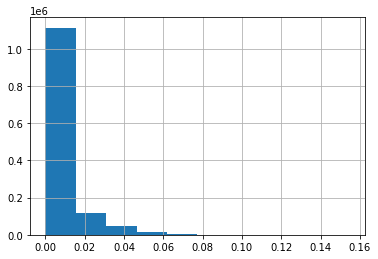

In [89]:
res["proba"].hist()